In [1]:
import numpy as np
x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

dump(xgb, "/home/jovyan/MQTTset/pre_train/XGB.joblib")

model = xgb


epsilon = 0.01
FPR: [1.04804137e-02 3.16875093e-02 1.41262890e-04 3.92741335e-02
 2.69820439e-01 3.03504646e-01]
TPR: [0.27166169 0.7936382  0.36956522 0.05878442 0.46491763 0.91090185]
FNR: [0.72833831 0.2063618  0.63043478 0.94121558 0.53508237 0.08909815]
TNR: [0.98951959 0.96831249 0.99985874 0.96072587 0.73017956 0.69649535]
Accuracy: 0.3950045321784671
Precision(micro,macro,weighted): 0.3950045321784671,0.5080505027184429,0.6997927908077247
F1(micro,macro,weighted: 0.3950045321784671,0.34778704917339837,0.41672121264759227
Recall(micro,macro,weighted: 0.3950045321784671,0.4782448348761766,0.3950045321784671
FPR: 0.1091514008011329
tpr: 0.4782448348761766
fnr: 0.5217551651238234
tnr: 0.8908485991988672


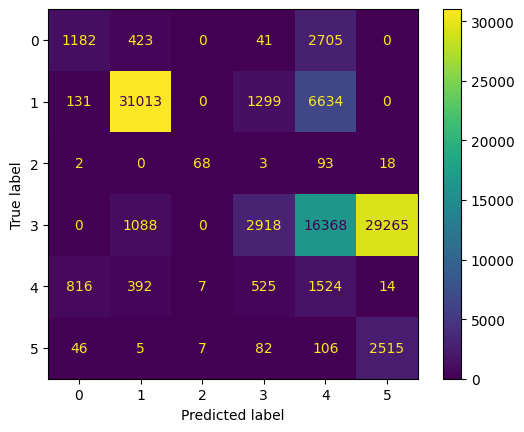

epsilon = 0.1
FPR: [1.04804137e-02 3.16875093e-02 1.41262890e-04 3.92741335e-02
 2.69820439e-01 3.03504646e-01]
TPR: [0.27166169 0.7936382  0.36956522 0.05878442 0.46491763 0.91090185]
FNR: [0.72833831 0.2063618  0.63043478 0.94121558 0.53508237 0.08909815]
TNR: [0.98951959 0.96831249 0.99985874 0.96072587 0.73017956 0.69649535]
Accuracy: 0.3950045321784671
Precision(micro,macro,weighted): 0.3950045321784671,0.5080505027184429,0.6997927908077247
F1(micro,macro,weighted: 0.3950045321784671,0.34778704917339837,0.41672121264759227
Recall(micro,macro,weighted: 0.3950045321784671,0.4782448348761766,0.3950045321784671
FPR: 0.1091514008011329
tpr: 0.4782448348761766
fnr: 0.5217551651238234
tnr: 0.8908485991988672


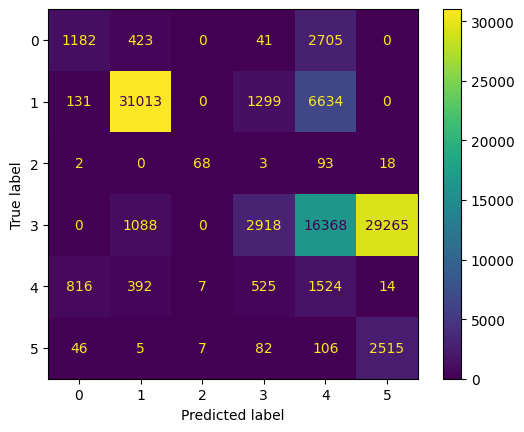

epsilon = 0.2
FPR: [1.04804137e-02 3.16875093e-02 1.41262890e-04 3.92741335e-02
 2.69820439e-01 3.03504646e-01]
TPR: [0.27166169 0.7936382  0.36956522 0.05878442 0.46491763 0.91090185]
FNR: [0.72833831 0.2063618  0.63043478 0.94121558 0.53508237 0.08909815]
TNR: [0.98951959 0.96831249 0.99985874 0.96072587 0.73017956 0.69649535]
Accuracy: 0.3950045321784671
Precision(micro,macro,weighted): 0.3950045321784671,0.5080505027184429,0.6997927908077247
F1(micro,macro,weighted: 0.3950045321784671,0.34778704917339837,0.41672121264759227
Recall(micro,macro,weighted: 0.3950045321784671,0.4782448348761766,0.3950045321784671
FPR: 0.1091514008011329
tpr: 0.4782448348761766
fnr: 0.5217551651238234
tnr: 0.8908485991988672


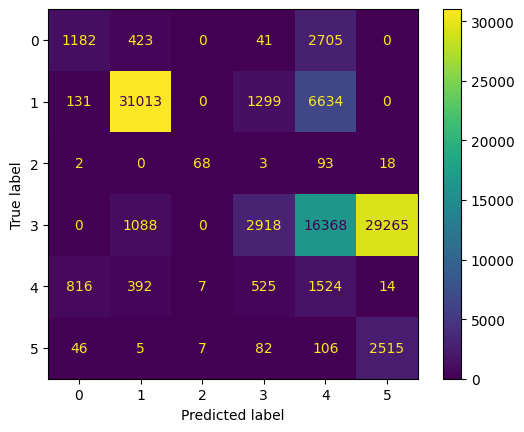

epsilon = 0.3
FPR: [1.04804137e-02 3.16875093e-02 1.41262890e-04 3.92741335e-02
 2.69820439e-01 3.03504646e-01]
TPR: [0.27166169 0.7936382  0.36956522 0.05878442 0.46491763 0.91090185]
FNR: [0.72833831 0.2063618  0.63043478 0.94121558 0.53508237 0.08909815]
TNR: [0.98951959 0.96831249 0.99985874 0.96072587 0.73017956 0.69649535]
Accuracy: 0.3950045321784671
Precision(micro,macro,weighted): 0.3950045321784671,0.5080505027184429,0.6997927908077247
F1(micro,macro,weighted: 0.3950045321784671,0.34778704917339837,0.41672121264759227
Recall(micro,macro,weighted: 0.3950045321784671,0.4782448348761766,0.3950045321784671
FPR: 0.1091514008011329
tpr: 0.4782448348761766
fnr: 0.5217551651238234
tnr: 0.8908485991988672


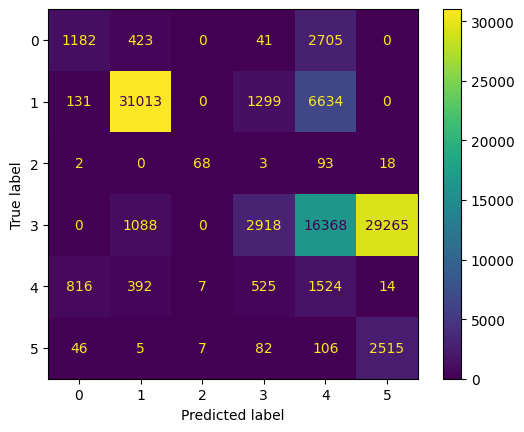

epsilon = 0.01
FPR: [1.13019939e-02 3.03755003e-02 1.61443303e-04 3.60919216e-02
 2.80454527e-01 3.03173140e-01]
TPR: [0.29418524 0.76582133 0.36956522 0.05940893 0.48169616 0.93661717]
FNR: [0.70581476 0.23417867 0.63043478 0.94059107 0.51830384 0.06338283]
TNR: [0.98869801 0.9696245  0.99983856 0.96390808 0.71954547 0.69682686]
Accuracy: 0.3866250377681539
Precision(micro,macro,weighted): 0.3866250377681539,0.5090860071039851,0.7112935435677045
F1(micro,macro,weighted: 0.38662503776815393,0.3485924471817614,0.411888474564451
Recall(micro,macro,weighted: 0.3866250377681539,0.48454900761070924,0.3866250377681539
FPR: 0.11025975422181011
tpr: 0.48454900761070924
fnr: 0.5154509923892908
tnr: 0.8897402457781897


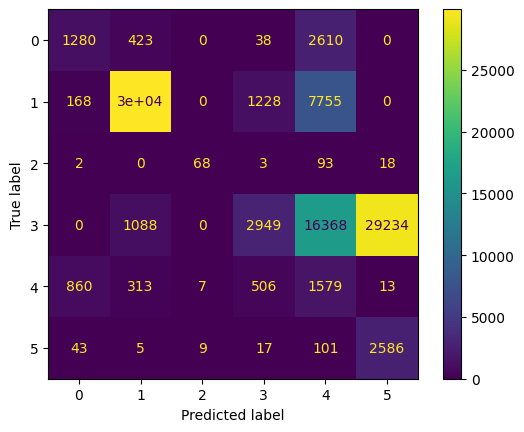

epsilon = 0.1
FPR: [1.16285194e-02 2.94620763e-02 1.31172684e-04 5.71992508e-02
 2.10692413e-01 2.90213304e-01]
TPR: [0.26476672 0.89564194 0.38586957 0.09921634 0.5        0.91633466]
FNR: [0.73523328 0.10435806 0.61413043 0.90078366 0.5        0.08366534]
TNR: [0.98837148 0.97053792 0.99986883 0.94280075 0.78930759 0.7097867 ]
Accuracy: 0.456400443146339
Precision(micro,macro,weighted): 0.456400443146339,0.5166119630247411,0.7203886741830035
F1(micro,macro,weighted: 0.456400443146339,0.375883033384896,0.47377669268872596
Recall(micro,macro,weighted: 0.456400443146339,0.5103048710946735,0.456400443146339
FPR: 0.09988778938956121
tpr: 0.5103048710946735
fnr: 0.48969512890532646
tnr: 0.9001122106104388


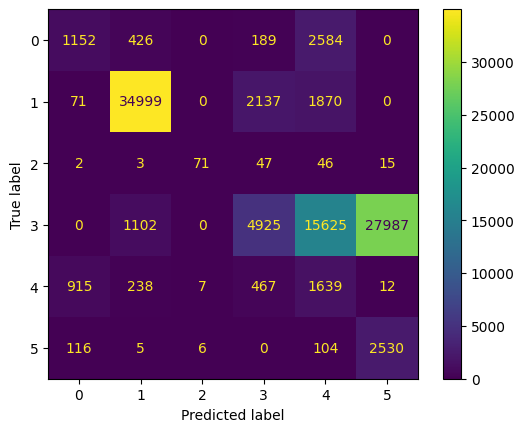

epsilon = 0.2
FPR: [1.16495855e-02 6.86562702e-02 1.21082477e-04 7.86288292e-02
 1.84216556e-01 2.89622808e-01]
TPR: [0.34773615 0.89239194 0.4076087  0.07810391 0.49450885 0.91705904]
FNR: [0.65226385 0.10760806 0.5923913  0.92189609 0.50549115 0.08294096]
TNR: [0.98835041 0.93134373 0.99987892 0.92137117 0.81578344 0.71037719]
Accuracy: 0.448081377782254
Precision(micro,macro,weighted): 0.448081377782254,0.4998421449847595,0.6329494024251976
F1(micro,macro,weighted: 0.448081377782254,0.38528938607312635,0.4480693433338539
Recall(micro,macro,weighted: 0.448081377782254,0.5229014310069632,0.448081377782254
FPR: 0.10548252189779994
tpr: 0.5229014310069632
fnr: 0.4770985689930369
tnr: 0.8945174781022001


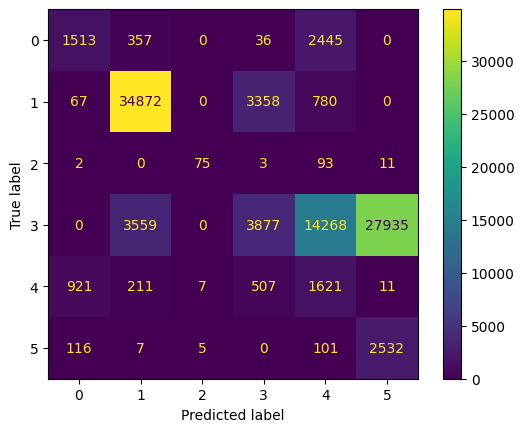

epsilon = 0.3
FPR: [1.26291619e-02 2.49613871e-02 1.51353097e-04 4.95458299e-02
 2.08515602e-01 2.88586850e-01]
TPR: [0.43300391 0.92507101 0.41304348 0.08007816 0.49054301 0.92140529]
FNR: [0.56699609 0.07492899 0.58695652 0.91992184 0.50945699 0.07859471]
TNR: [0.98737084 0.97503861 0.99984865 0.95045417 0.7914844  0.71141315]
Accuracy: 0.46566623023466613
Precision(micro,macro,weighted): 0.46566623023466613,0.5303474784926471,0.719782414687593
F1(micro,macro,weighted: 0.46566623023466613,0.40436166944837254,0.4734813234746257
Recall(micro,macro,weighted: 0.46566623023466613,0.5438574775611784,0.46566623023466613
FPR: 0.09739836395205048
tpr: 0.5438574775611784
fnr: 0.4561425224388216
tnr: 0.9026016360479495


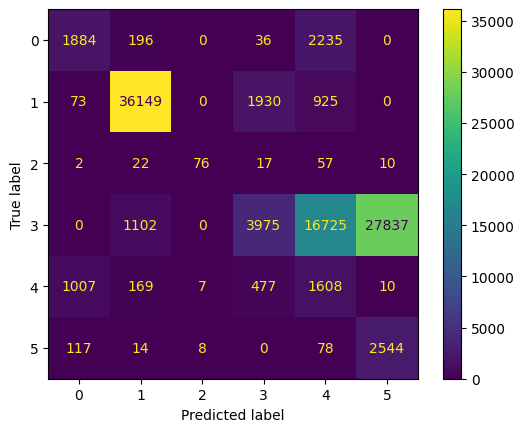

epsilon = 0.01
FPR: [1.13019939e-02 3.03755003e-02 1.61443303e-04 3.60919216e-02
 2.80454527e-01 3.03173140e-01]
TPR: [0.29418524 0.76582133 0.36956522 0.05940893 0.48169616 0.93661717]
FNR: [0.70581476 0.23417867 0.63043478 0.94059107 0.51830384 0.06338283]
TNR: [0.98869801 0.9696245  0.99983856 0.96390808 0.71954547 0.69682686]
Accuracy: 0.3866250377681539
Precision(micro,macro,weighted): 0.3866250377681539,0.5090860071039851,0.7112935435677045
F1(micro,macro,weighted: 0.38662503776815393,0.3485924471817614,0.411888474564451
Recall(micro,macro,weighted: 0.3866250377681539,0.48454900761070924,0.3866250377681539
FPR: 0.11025975422181011
tpr: 0.48454900761070924
fnr: 0.5154509923892908
tnr: 0.8897402457781897


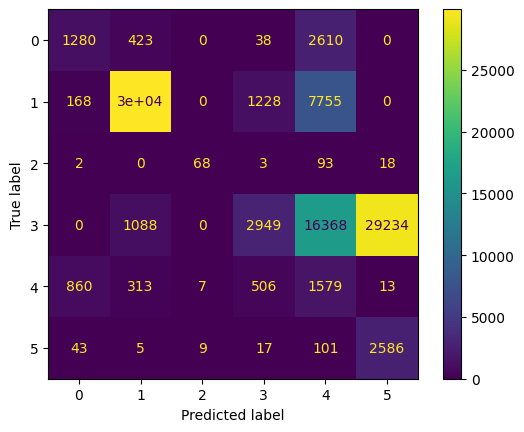

epsilon = 0.1
FPR: [1.16285194e-02 1.75609918e-01 1.31172684e-04 5.67964391e-02
 1.35805941e-01 2.90182225e-01]
TPR: [0.2617789  0.85531131 0.38586957 0.09927678 0.5        0.91597247]
FNR: [0.7382211  0.14468869 0.61413043 0.90072322 0.5        0.08402753]
TNR: [0.98837148 0.82439008 0.99986883 0.94320356 0.86419406 0.70981777]
Accuracy: 0.4404169604189747
Precision(micro,macro,weighted): 0.4404169604189747,0.4905356380480898,0.646764364183302
F1(micro,macro,weighted: 0.4404169604189747,0.36436055303943654,0.4289178523326767
Recall(micro,macro,weighted: 0.4404169604189747,0.503034837857114,0.4404169604189747
FPR: 0.11169236921215948
tpr: 0.503034837857114
fnr: 0.49696516214288594
tnr: 0.8883076307878405


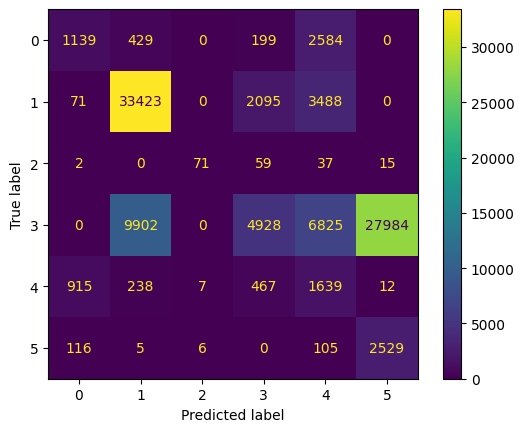

epsilon = 0.2
FPR: [1.23131695e-02 6.93870094e-02 1.21082477e-04 7.37548086e-02
 1.85580969e-01 2.89622808e-01]
TPR: [0.34428867 0.89239194 0.4076087  0.07933278 0.48169616 0.91705904]
FNR: [0.65571133 0.10760806 0.5923913  0.92066722 0.51830384 0.08294096]
TNR: [0.98768683 0.93061299 0.99987892 0.92624519 0.81441903 0.71037719]
Accuracy: 0.44812166381307283
Precision(micro,macro,weighted): 0.44812166381307283,0.4998943831015326,0.6417119027262533
F1(micro,macro,weighted: 0.44812166381307283,0.3837132836750176,0.4486920807975465
Recall(micro,macro,weighted: 0.44812166381307283,0.5203962140831218,0.44812166381307283
FPR: 0.10512997444982437
tpr: 0.5203962140831218
fnr: 0.47960378591687824
tnr: 0.8948700255501757


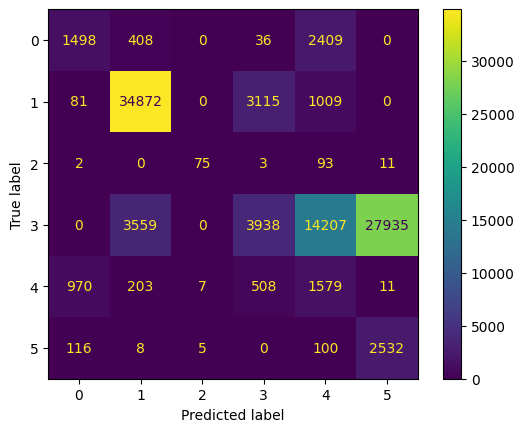

epsilon = 0.3
FPR: [1.28714227e-02 2.43801173e-02 1.51353097e-04 7.60105537e-02
 2.09130109e-01 2.88586850e-01]
TPR: [0.41231901 0.89275021 0.41304348 0.08007816 0.4881025  0.92140529]
FNR: [0.58768099 0.10724979 0.58695652 0.91992184 0.5118975  0.07859471]
TNR: [0.98712858 0.97561988 0.99984865 0.92398945 0.79086989 0.71141315]
Accuracy: 0.45195890824856483
Precision(micro,macro,weighted): 0.45195890824856483,0.5100111226664503,0.6665028885450621
F1(micro,macro,weighted: 0.45195890824856483,0.39748695306700904,0.46416159810795465
Recall(micro,macro,weighted: 0.45195890824856483,0.5346164417197259,0.45195890824856483
FPR: 0.10185506749981695
tpr: 0.5346164417197259
fnr: 0.4653835582802741
tnr: 0.8981449325001831


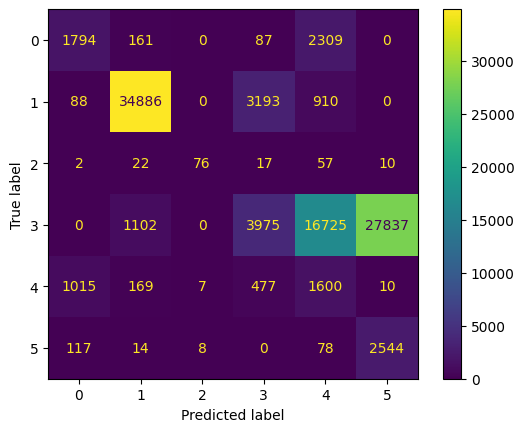

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [0.00907951 0.15471742 0.         0.14039999 0.18578928 0.4322846 ]
TPR: [0.12571823 0.30291476 0.         0.14254921 0.29194631 0.78160087]
FNR: [0.87428177 0.69708524 1.         0.85745079 0.70805369 0.21839913]
TNR: [0.99092049 0.84528258 1.         0.85960001 0.81421072 0.5677154 ]
Accuracy: 0.22736428643367912
Precision(micro,macro,weighted): 0.22736428643367912,0.25860605968875605,0.4921333701724329
F1(micro,macro,weighted: 0.22736428643367912,0.16407378595933872,0.2795471550206899
Recall(micro,macro,weighted: 0.22736428643367912,0.2741215611623588,0.22736428643367912
FPR: 0.15371180012262314
tpr: 0.2741215611623588
fnr: 0.7258784388376411
tnr: 0.8462881998773769


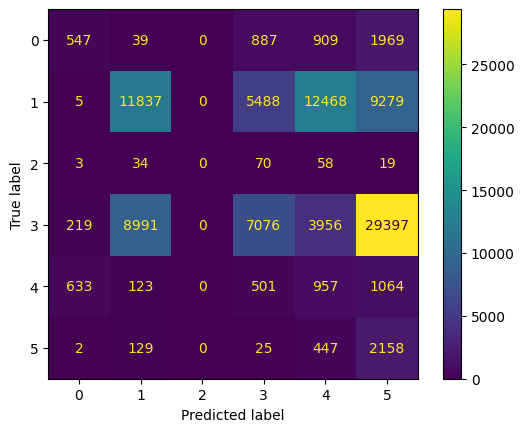

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [0.01430392 0.15451813 0.         0.14046041 0.22502396 0.4322846 ]
TPR: [0.12571823 0.19382245 0.         0.14254921 0.29469189 0.78160087]
FNR: [0.87428177 0.80617755 1.         0.85745079 0.70530811 0.21839913]
TNR: [0.98569608 0.84548187 1.         0.85953959 0.77497604 0.5677154 ]
Accuracy: 0.1845200926578709
Precision(micro,macro,weighted): 0.1845200926578709,0.221914998442622,0.44375952777328004
F1(micro,macro,weighted: 0.18452009265787087,0.13917681938774681,0.2303372452379258
Recall(micro,macro,weighted: 0.1845200926578709,0.2563971064348042,0.1845200926578709
FPR: 0.1610985027028928
tpr: 0.2563971064348042
fnr: 0.7436028935651957
tnr: 0.8389014972971073


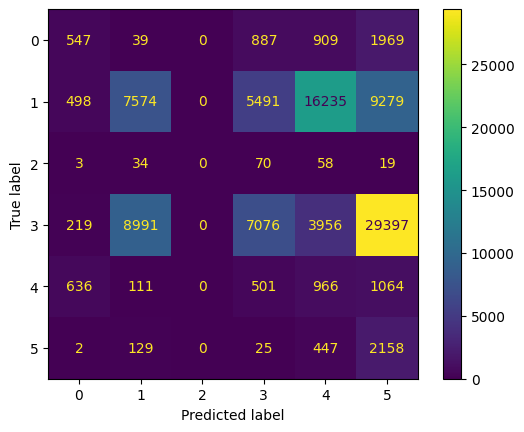

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [0.01430392 0.15451813 0.         0.14046041 0.22502396 0.4322846 ]
TPR: [0.12571823 0.19382245 0.         0.14254921 0.29469189 0.78160087]
FNR: [0.87428177 0.80617755 1.         0.85745079 0.70530811 0.21839913]
TNR: [0.98569608 0.84548187 1.         0.85953959 0.77497604 0.5677154 ]
Accuracy: 0.1845200926578709
Precision(micro,macro,weighted): 0.1845200926578709,0.221914998442622,0.44375952777328004
F1(micro,macro,weighted: 0.18452009265787087,0.13917681938774681,0.2303372452379258
Recall(micro,macro,weighted: 0.1845200926578709,0.2563971064348042,0.1845200926578709
FPR: 0.1610985027028928
tpr: 0.2563971064348042
fnr: 0.7436028935651957
tnr: 0.8389014972971073


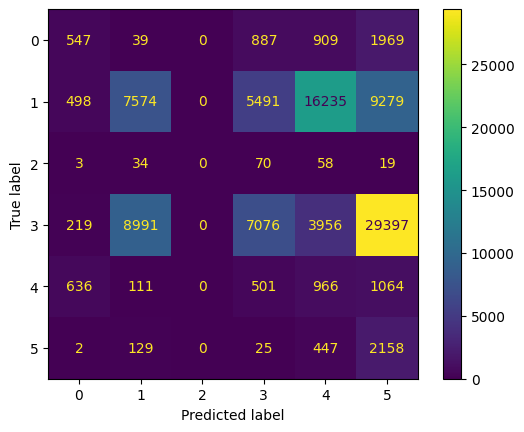

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.0001
FPR: [0.01430392 0.15451813 0.         0.14046041 0.22502396 0.4322846 ]
TPR: [0.12571823 0.19382245 0.         0.14254921 0.29469189 0.78160087]
FNR: [0.87428177 0.80617755 1.         0.85745079 0.70530811 0.21839913]
TNR: [0.98569608 0.84548187 1.         0.85953959 0.77497604 0.5677154 ]
Accuracy: 0.1845200926578709
Precision(micro,macro,weighted): 0.1845200926578709,0.221914998442622,0.44375952777328004
F1(micro,macro,weighted: 0.18452009265787087,0.13917681938774681,0.2303372452379258
Recall(micro,macro,weighted: 0.1845200926578709,0.2563971064348042,0.1845200926578709
FPR: 0.1610985027028928
tpr: 0.2563971064348042
fnr: 0.7436028935651957
tnr: 0.8389014972971073


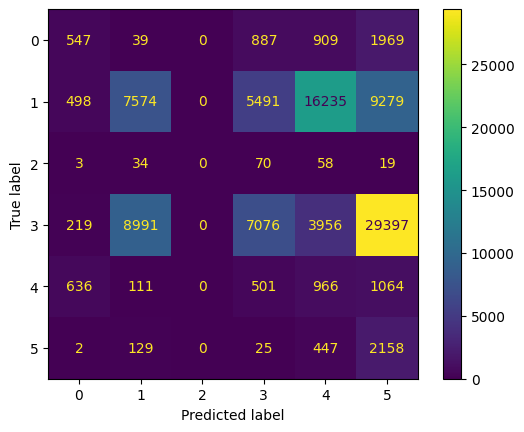

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "DF", epsilon)